<a href="https://colab.research.google.com/github/akshayan0608/PROJECTS/blob/main/Customer_Segmentation_for_a_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME :CUSTOMER SEGMENTATION FOR A RETAIL STORE

PROJECT TYPE :CUSTOMER SEGMENTATION

PREPARED BY  :AKSHAYA N

OBJECTIVES OF THE PROJECT:

1. To segment retail customers into meaningful groups based on demographics and spending behavior.
2. To identify high-value and loyal customers for targeted marketing.
3. To analyze customer profiles and purchasing patterns for better decision-making.
4. To optimize marketing strategies, promotions, and resource allocation.
5. To improve customer satisfaction, retention, and overall business growth.




**GIT-HUB LINK :** https://github.com/akshayan0608/PROJECTS

TECHNIQUES USED IN PROJECT :K-Means,Elbow method

**K-Means :** K-Means is an unsupervised learning algorithm used to group data points into K clusters.

It works by finding groups of similar data points and assigning them to clusters.

Each cluster has a centroid (center point), and data points are grouped based on their closeness to this centroid.

**The Elbow Method** is a technique used to find the optimal number of clusters (K) in K-Means clustering.

It helps answer: “How many clusters should I choose?”


Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


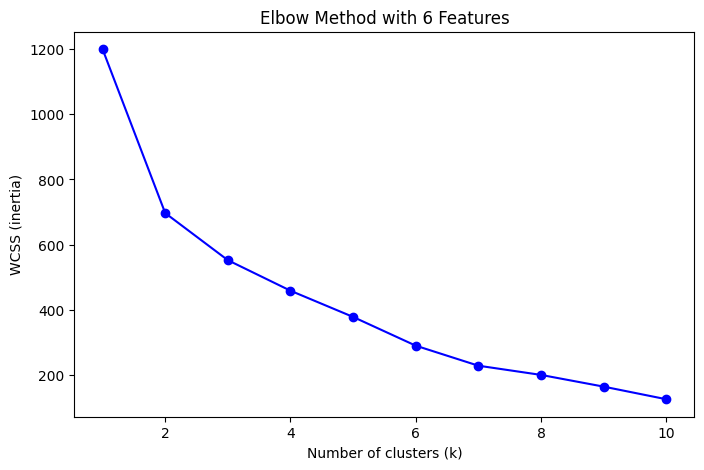

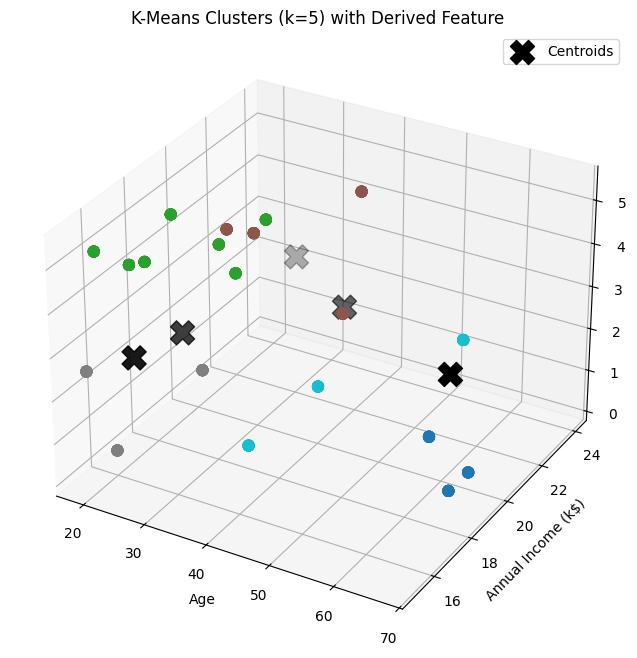

Cluster Profiles:
   Cluster  Count    Avg_Age  Avg_Income  Avg_Spend  Avg_Gender  \
0        0     30  63.000000   19.333333  10.666667    0.666667   
1        1     70  25.428571   17.714286  82.285714    0.571429   
2        2     40  28.000000   22.750000  69.500000    0.500000   
3        3     30  23.333333   16.000000  28.333333    0.666667   
4        4     30  41.333333   21.000000  16.000000    0.000000   

   Avg_Income_per_Age  Avg_Spend_to_Income  
0            0.308428             0.548246  
1            0.710685             4.679330  
2            0.861851             3.059136  
3            0.712620             1.775980  
4            0.514464             0.720238  
Silhouette Score: 0.4079884893773601


In [2]:
# -------------------------------
# Customer Segmentation Project
# Using Age + Income + Spending + Gender + Derived Features


# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Load dataset
df = pd.read_csv("Mall_Customers.csv")
print("Shape:", df.shape)
df.head()
df.tail()
df.info()


# 3. Feature engineering

# Convert Gender to numeric
df["Gender"] = df["Gender"].map({"Male":0, "Female":1})

# Derived features
df["Income_per_Age"] = df["Annual Income (k$)"] / df["Age"]
df["Spend_to_Income"] = df["Spending Score (1-100)"] / df["Annual Income (k$)"]

# 4. Select features for clustering
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)",
            "Gender", "Income_per_Age", "Spend_to_Income"]
X = df[features].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Elbow Method
wcss = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method with 6 Features")
plt.show()

# 6. Train KMeans with chosen k (example: 5)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = labels


# 7. Updated 3D Visualization (Age + Annual Income + Spend_to_Income)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["Age"], df["Annual Income (k$)"], df["Spend_to_Income"],
    c=df["Cluster"], cmap="tab10", s=60, alpha=0.8
)

# Centroids for the selected 3 features
centroids_3d = kmeans.cluster_centers_[:, [0,1,5]]  # columns: Age, Income, Spend_to_Income
centroids_3d = scaler.inverse_transform(
    np.hstack([centroids_3d, np.zeros((centroids_3d.shape[0], X_scaled.shape[1]-3))])
)[:, [0,1,5]]

ax.scatter(
    centroids_3d[:,0], centroids_3d[:,1], centroids_3d[:,2],
    c="black", s=300, marker="X", label="Centroids"
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spend to Income Ratio")
ax.set_title(f"K-Means Clusters (k={k_opt}) with Derived Feature")
plt.legend()
plt.show()

# 8. Cluster profiling
cluster_profile = df.groupby("Cluster").agg(
    Count=("CustomerID", "count"),
    Avg_Age=("Age", "mean"),
    Avg_Income=("Annual Income (k$)", "mean"),
    Avg_Spend=("Spending Score (1-100)", "mean"),
    Avg_Gender=("Gender", "mean"),
    Avg_Income_per_Age=("Income_per_Age", "mean"),
    Avg_Spend_to_Income=("Spend_to_Income", "mean")
).reset_index()

print("Cluster Profiles:")
print(cluster_profile)

# 9. Silhouette Score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)
